# Tidy data

In [1]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

In [2]:
library(tidyverse)
library(fivethirtyeight)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')



## 3. Now it's your turn

**Task A**

Inspect the `police_locals` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/most-police-dont-live-in-the-cities-they-serve/.

1. Create a new dataset, called `police_locals_new`, made of the following columns: `city`, `force_size`, `ethnic_group`, `perc_locals`. You should create the `ethnic_group` column using a pivot function, as shown in this wpa or in wpa_4. The values in this column should be `all`, `white`, `non_white`, `black`, `hispanic`, `asian`. The `perc_locals` column should contain the percentage of officers that live in the town where they work, corresponding to their ethnic group. Rearrange based on the `ethnic_group` and inspect it by printing the first 10 lines.

2. Make a boxplot, with `ethnic_group` on the x-axis and `perc_locals` on the y-axis. `ethnic_group` should be ordered from the lowest `perc_locals` to the highest. Put appropriate labels.

**Task B**

Inspect the `unisex_names` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/there-are-922-unisex-names-in-america-is-yours-one-of-them/.

1. Create a new dataset, called `unisex_names_new`, made of the following columns: `name`, `total`, `gap`, `gender`, `share`. The `gender` column should only contain the values "male" and "female". The `share` column should contain the percentages. 

2. Multiply the `share` column by 100. Re-arrange so that the first rows contain the names with the highest `total`. Print the first 10 rows of the newly created dataset. Create now a new dataset, called `unisex_names_common`, with the names in `unisex_names_new` that have a total higher than 50000.

2. Using `unisex_names_common`, make a barplot that has `share` on the y-axis, `name` on the x-axis, and with each bar split vertically by color based on the `gender`.

**Task C**

Inspect the `tv_states` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/the-media-really-started-paying-attention-to-puerto-rico-when-trump-did/.

1. Create a new dataset, with a different name, that is the long version of `tv_states`. You should decide how to call the new columns, as well as which columns should be used for the transformation.

2. With the newly created dataset, make a plot of your choosing to illustrate the information contained in this dataset. As an inspiration, you can have a look at what plot was done in the article above.

#### Task A

In [3]:
head(police_locals)

city,force_size,all,white,non_white,black,hispanic,asian
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
New York,32300,0.6179567,0.44638656,0.7644189,0.7708914,0.76286073,0.7492355
Chicago,12120,0.8750000,0.87196262,0.8774003,0.8974057,0.83982684,0.9666667
Los Angeles,10100,0.2282178,0.15277778,0.2638484,0.3873874,0.21767956,0.3052632
Washington,9340,0.1156317,0.05677419,0.1573651,0.1701891,0.08988764,0.2307692
Houston,7700,0.2922078,0.17373461,0.3992583,0.3663793,0.45714286,0.4081633
Philadelphia,6045,0.8354012,0.77689873,0.8994801,0.9246575,0.81739130,NA


In [4]:
police_locals_new = police_locals %>%
    pivot_longer(cols = all:asian,
                 names_to = "ethnic_group",
                 values_to = "perc_locals",
                 names_repair = "minimal") %>%
    arrange(ethnic_group)

head(police_locals_new, 30)

city,force_size,ethnic_group,perc_locals
<chr>,<int>,<chr>,<dbl>
New York,32300,all,0.61795666
Chicago,12120,all,0.87500000
Los Angeles,10100,all,0.22821782
Washington,9340,all,0.11563169
Houston,7700,all,0.29220779
Philadelphia,6045,all,0.83540116
Phoenix,4475,all,0.31173184
San Diego,4460,all,0.36210762
Dallas,3605,all,0.19140083


Warning message:
“Removed 111 rows containing non-finite values (stat_boxplot).”


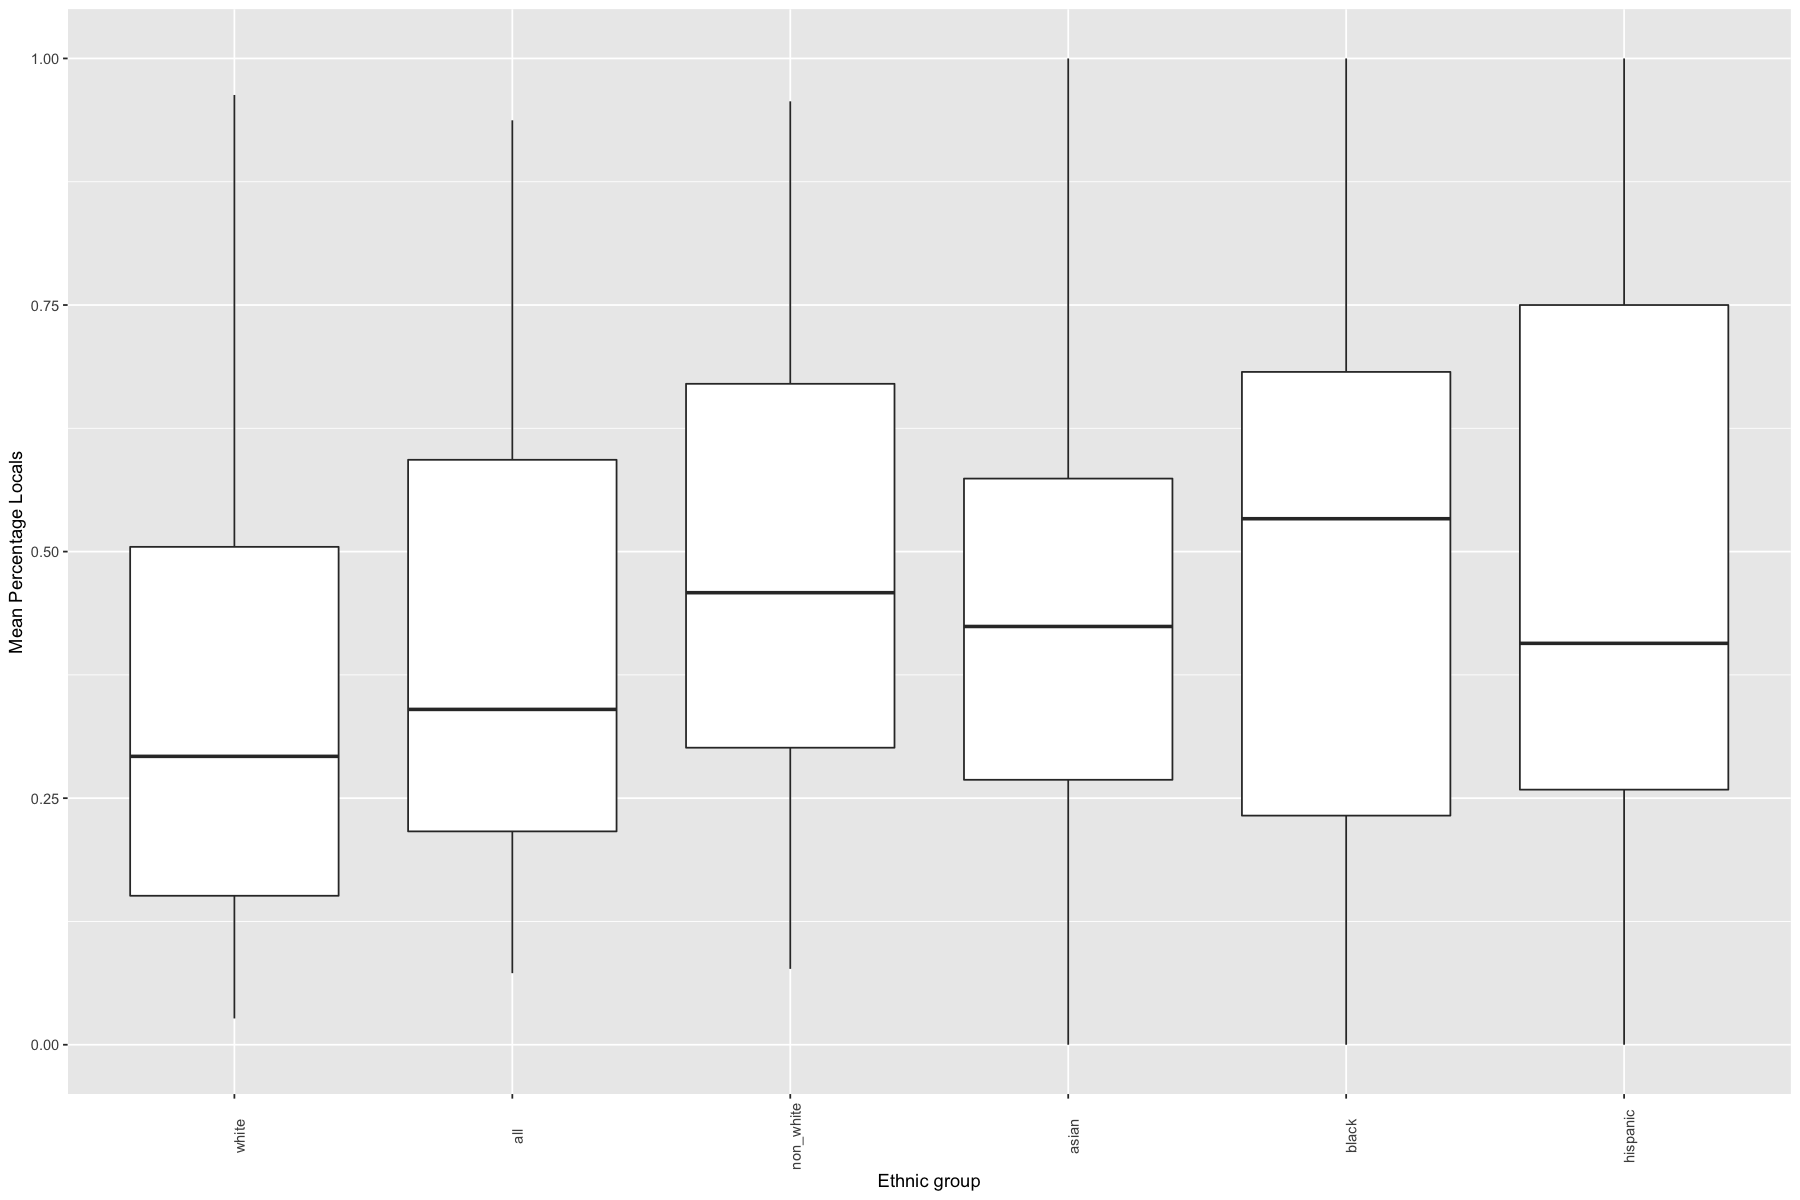

In [5]:
ggplot(data = police_locals_new, mapping = aes(x = reorder(ethnic_group, perc_locals), y = perc_locals)) +
    geom_boxplot() +
    labs(x = 'Ethnic group', y = 'Mean Percentage Locals') + 
    theme(axis.text.x = element_text(angle = 90))

#### Task B

In [6]:
head(unisex_names)

name,total,male_share,female_share,gap
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Casey,176544.3,0.5842866,0.4157134,0.16857313
Riley,154860.7,0.5076391,0.4923609,0.01527814
Jessie,136381.8,0.4778343,0.5221657,0.04433146
Jackie,132928.8,0.4211326,0.5788674,0.15773480
Avery,121797.4,0.3352131,0.6647869,0.32957385
Jaime,109870.2,0.5617929,0.4382071,0.12358580


In [7]:
unisex_names_new = unisex_names %>%
    pivot_longer(cols = male_share:female_share,
                 names_to = "gender",
                 values_to = "share",
                 names_repair = "minimal") %>%
    separate(col = gender,
             into = c('gender', 'to_delete'),
             sep = '_',
             remove = TRUE) %>%
    select(-to_delete) %>%
    mutate(share = share*100) %>%
    arrange(desc(total))

dim(unisex_names_new)
head(unisex_names_new, 10)

[1] 1838    5

name,total,gap,gender,share
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Casey,176544.3,0.16857313,male,58.42866
Casey,176544.3,0.16857313,female,41.57134
Riley,154860.7,0.01527814,male,50.76391
Riley,154860.7,0.01527814,female,49.23609
Jessie,136381.8,0.04433146,male,47.78343
Jessie,136381.8,0.04433146,female,52.21657
Jackie,132928.8,0.15773480,male,42.11326
Jackie,132928.8,0.15773480,female,57.88674
Avery,121797.4,0.32957385,male,33.52131


In [8]:
unisex_names_common = unisex_names_new %>%
    filter(total > 50000)

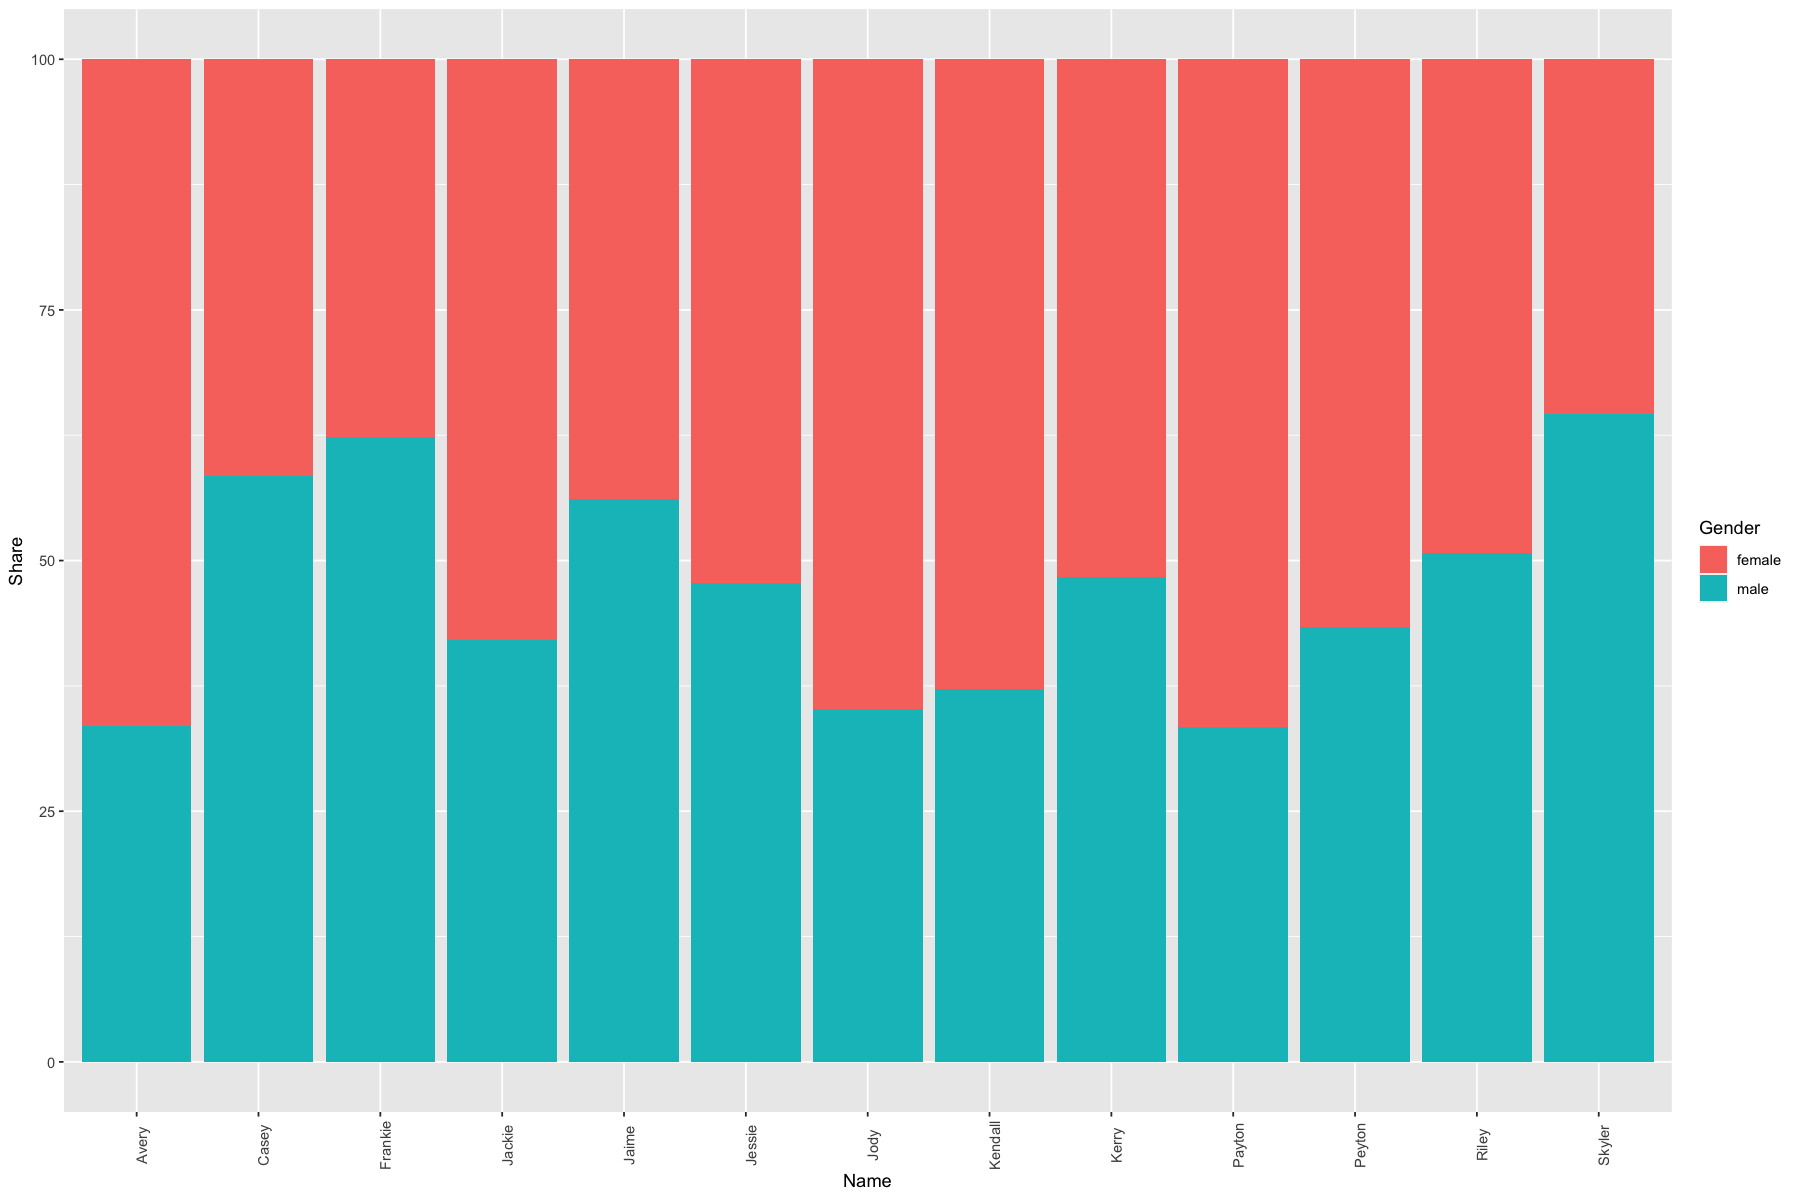

In [9]:
ggplot(data = unisex_names_common, mapping = aes(x = name, y = share, fill = gender)) +
    geom_col() +
    labs(x = 'Name', y = 'Share', fill='Gender') + 
    theme(axis.text.x = element_text(angle = 90))

### Task C

In [10]:
head(tv_states)

date,florida,texas,puerto_rico
<date>,<dbl>,<dbl>,<dbl>
2017-08-20,0.0923,0.0286,0.0000
2017-08-21,0.0441,0.0904,0.0099
2017-08-22,0.0359,0.0334,0.0000
2017-08-23,0.0431,0.0839,0.0103
2017-08-24,0.0492,0.3978,0.0184
2017-08-25,0.0442,1.4639,0.0000


In [11]:
tv_states_new = pivot_longer(tv_states,
                             cols = florida:puerto_rico,
                             names_to = 'state',
                             values_to = 'share_of_sentences')

dim(tv_states_new)
head(tv_states_new, 10)

[1] 156   3

date,state,share_of_sentences
<date>,<chr>,<dbl>
2017-08-20,florida,0.0923
2017-08-20,texas,0.0286
2017-08-20,puerto_rico,0.0000
2017-08-21,florida,0.0441
2017-08-21,texas,0.0904
2017-08-21,puerto_rico,0.0099
2017-08-22,florida,0.0359
2017-08-22,texas,0.0334
2017-08-22,puerto_rico,0.0000


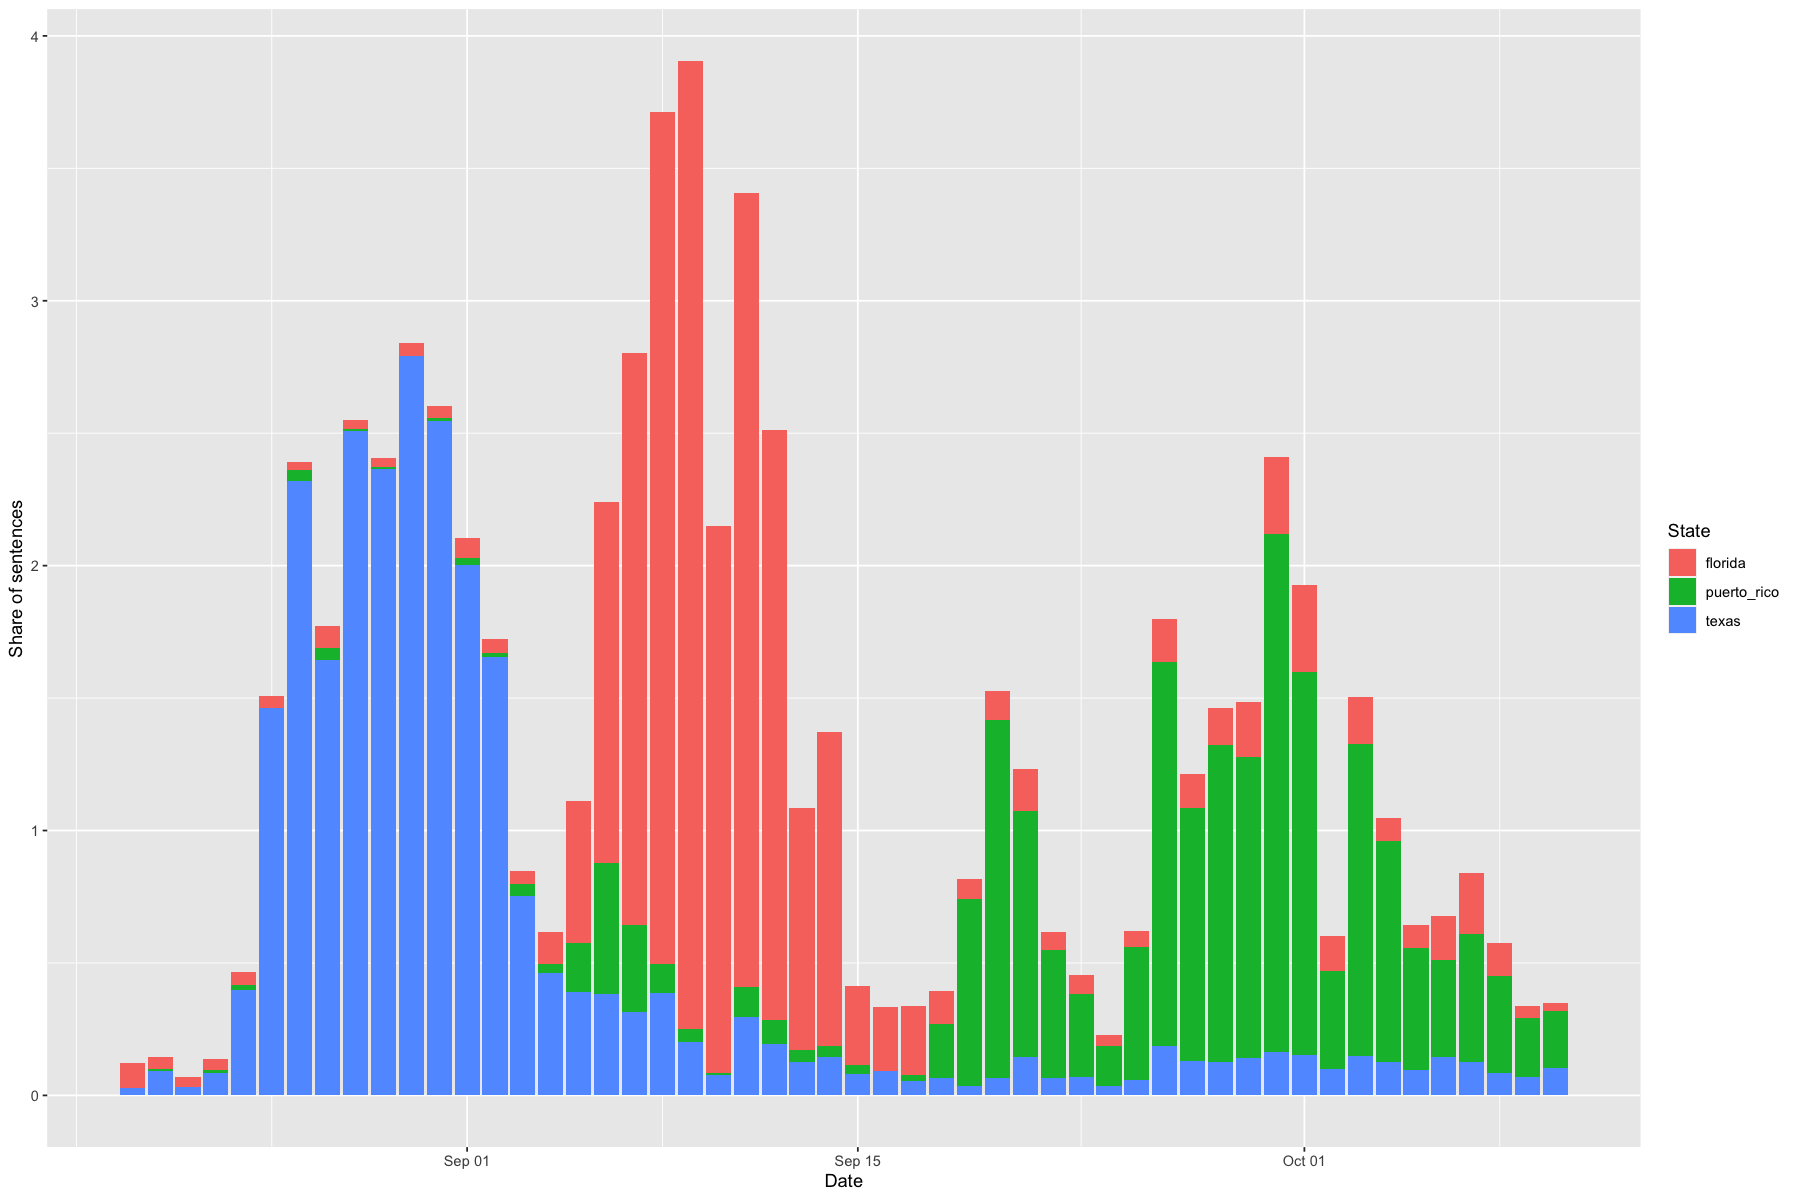

In [12]:
ggplot(data = tv_states_new, mapping = aes(x = date, y= share_of_sentences, fill = state)) + 
    geom_col() +
    labs(x = 'Date', fill = 'State', y= 'Share of sentences')

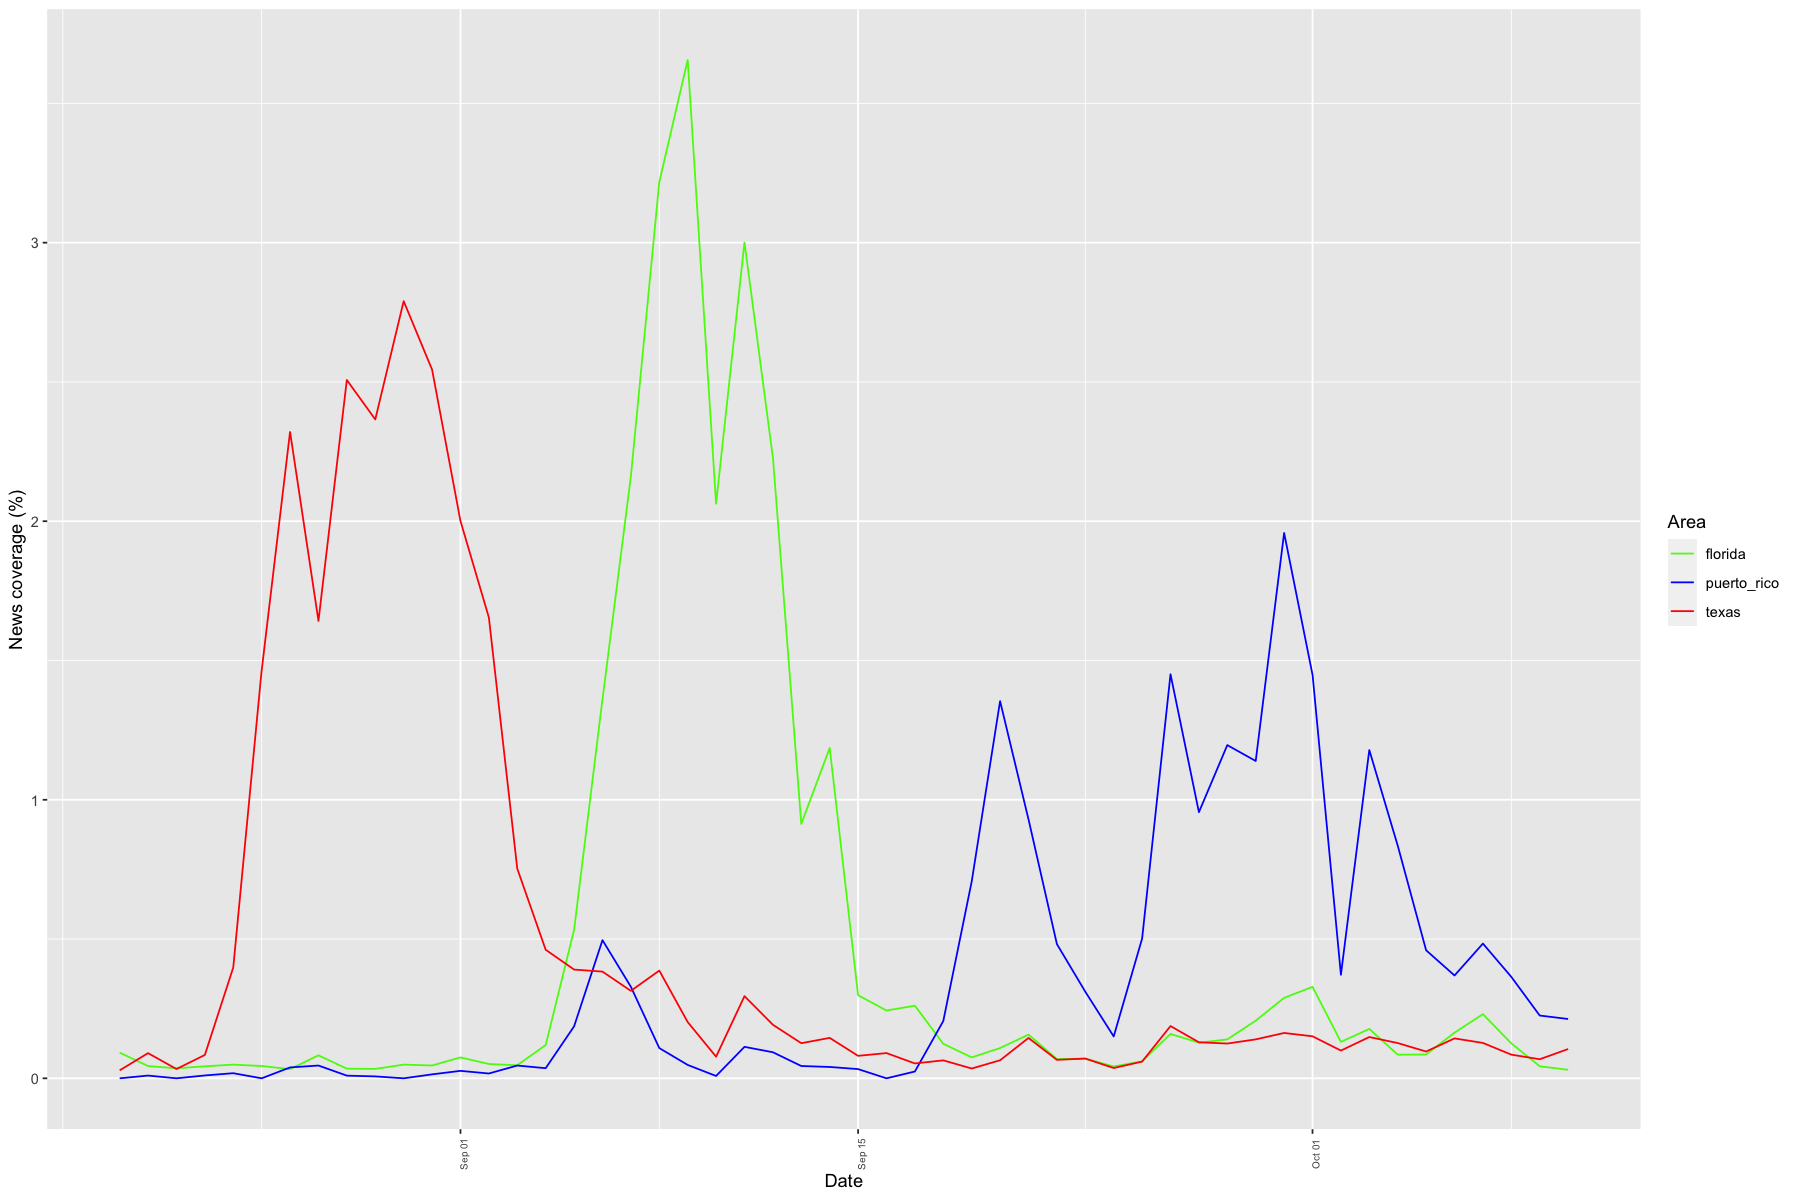

In [13]:
ggplot(tv_states_new, aes(x=date, y=share_of_sentences, group=state, color=state)) +  
    geom_line() + 
    labs(x = 'Date', y = 'News coverage (%)', color='Area') + 
    scale_color_manual(values=c("#54F708", "blue", "red")) + 
    theme(axis.text.x = element_text(angle = 90, size = 6))